# Dataset Exploration
In this notebook, exploratory analysis is performed on the dataset in order to identify patterns, attributes, or other important information that could be of help in the subsequent modelling and predictions.

In [ ]:
# Change directory for cleaner paths
%cd ..

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

### Data Overview
The dataset is created by joining the tracks with their corresponding features. Then, the relevant columns are selected and examined.

In [3]:
tracks = pd.read_csv("data/raw/tracks.csv")
features = pd.read_csv("data/raw/features.csv")
df = pd.merge(tracks, features, left_on='id',right_on='tt_id',suffixes=('_tt','_sp'))

In [4]:
df.shape

(10794, 28)

In [6]:
feature_names = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'time_signature',
    'duration_ms',
    'popularity'
]
targets = [
    'videos',
    'views'
]
metadata = [
    'title_tt',
    'title_sp',
    'album_tt',
    'album_sp',
    'artist'
]
df = df[metadata + targets + feature_names]

In [7]:
df.sample(20)

,title_tt,title_sp,album_tt,album_sp,artist,videos,views,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularity
2421,Slow Motion,Slow Motion,Slow Motion,Trigga Reloaded,Trey Songz,5,5500000,0.7330,0.40800,7,...,0,0.0388,0.67900,0.000039,0.1100,0.2910,94.947,4,197854,71
8639,Jerusalema (feat. Nomcebo Zikode) [Edit],Jerusalema (feat. Nomcebo Zikode) - Edit,Jerusalema (feat. Burna Boy & Nomcebo Zikode) ...,Jerusalema (feat. Burna Boy & Nomcebo Zikode) ...,"Master KG, Nomcebo Zikode",1,35800,0.9030,0.54500,1,...,1,0.0500,0.02260,0.000008,0.0571,0.8700,124.011,4,188987,58
7610,Hiking,Hiking,Hiking,Bloom,Limelight Glow,1,28100,0.5570,0.00998,5,...,1,0.0336,0.99600,0.945000,0.0966,0.0657,69.289,4,89000,41
10040,Texili - Trap Remix,Texili - Trap Remix,Texili - Trap Remix,Texili (Trap Remix),GOLDEN TBILISI,4,115600,0.8960,0.57200,2,...,1,0.0865,0.00905,0.876000,0.3060,0.1010,134.015,4,222090,49
5007,all I want is you,all I want is you,all I want is you,all I want is you,"Rebzyyx, hoshie star",2,902200,0.4590,0.99900,11,...,1,0.3110,0.11200,0.000000,0.2450,0.7810,145.904,4,151415,78
10405,六甲おろし ～阪神タイガースの歌～ （オルゴール）,六甲おろし ~阪神タイガースの歌~ (オルゴール),六甲おろし ～阪神タイガースの歌～ （オルゴール）,オルゴール作品集 古関裕而,Orgel Sound J-pop,1,437600,0.6450,0.48100,8,...,1,0.0480,0.68600,0.930000,0.1150,0.2610,109.991,5,205827,0
9478,Ikaw Lang Ang Aking Mahal,Ikaw Lang Ang Aking Mahal,Steady Lang,Tuloy Ang Byahe,Noel Cabangon,1,1200,0.6990,0.44900,9,...,1,0.0393,0.75600,0.000000,0.1210,0.5210,87.489,4,251813,37
536,De Me Theloun,De Me Theloun,Lingo,Lingo,Fy,7,663900,0.9030,0.52700,8,...,1,0.0664,0.01380,0.000006,0.0736,0.9410,144.980,4,225931,44
3371,Fall Sounds,Fall Sounds,Fall Sounds,Fall Sounds,lofee,6,10900000,0.7660,0.17600,2,...,0,0.2600,0.98700,0.813000,0.1080,0.6600,108.267,1,88644,32
1380,Ooh Ahh (My Life Be Like) [feat. Tobymac],Ooh Ahh (My Life Be Like) [feat. Tobymac],The Greatest Hits,The Art of Translation,"Grits, TobyMac",29,9100000,0.7570,0.86200,2,...,1,0.0696,0.11500,0.000203,0.2850,0.8230,99.017,4,233173,68


In [8]:
df.describe()

,videos,views,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,popularity
count,10794.000000,1.079400e+04,10794.000000,10794.000000,10794.000000,10794.000000,10794.000000,10794.000000,10794.000000,10794.000000,10794.000000,10794.000000,10794.000000,10794.000000,1.079400e+04,10794.000000
mean,9.866407,4.734696e+06,0.638451,0.611662,5.334445,-8.234118,0.563276,0.100939,0.313284,0.135880,0.180399,0.513113,121.943329,3.930424,2.070199e+05,50.252640
std,55.650002,1.379095e+07,0.174635,0.230864,3.619525,5.060229,0.496003,0.107599,0.311437,0.297060,0.145846,0.257097,29.292989,0.392974,1.211225e+05,24.081035
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.213000e+03,0.000000
25%,1.000000,6.770000e+04,0.538250,0.464250,2.000000,-9.649000,0.000000,0.037800,0.046225,0.000000,0.093700,0.306000,99.936000,4.000000,1.627730e+05,34.000000
50%,2.000000,2.456500e+05,0.664000,0.644000,5.000000,-6.928000,1.000000,0.055000,0.194500,0.000011,0.123000,0.518000,121.982000,4.000000,2.017915e+05,54.000000
75%,5.000000,2.100000e+06,0.766000,0.795000,9.000000,-5.196250,1.000000,0.114000,0.538000,0.010200,0.220000,0.718000,140.020000,4.000000,2.390000e+05,70.000000
max,2518.000000,3.102000e+08,0.984000,1.000000,11.000000,1.906000,1.000000,0.956000,0.996000,1.000000,0.994000,1.000000,220.099000,5.000000,5.951139e+06,100.000000


### Preprocessing
By examining the matches between the original titles and the ones found from the Spotify API, there are some discrepancies. Some have already been validating in the data collection stage, some have passed through but are still valid, and some are invalid and they cannot be eliminated without also eliminating valid data points. The action that is certain to only remove false positives is checking against the string "Original Sound"

In [9]:
df = df[df['title_tt'] != "Original Sound"]
df.shape

(10566, 21)

In [10]:
df.to_csv("data/processed/tracks.csv", index=False)

### Distribution analysis
The dataset contains around 10.000 datapoints, and the target variable (`views`) varies greatly in terms of magnitude, with values ranging from < 1000 to millions. In order to attempt to create a reasonable separation of different video popularities, a histogram of view counts is created using 10 different orders of magnitude as buckets.

(array([2.000e+00, 1.000e+00, 4.300e+01, 2.510e+02, 3.970e+02, 3.374e+03,
        3.143e+03, 1.827e+03, 1.497e+03, 2.580e+02]),
 array([0.        , 0.84916418, 1.69832836, 2.54749254, 3.39665672,
        4.2458209 , 5.09498508, 5.94414926, 6.79331343, 7.64247761,
        8.49164179]),
 <BarContainer object of 10 artists>)

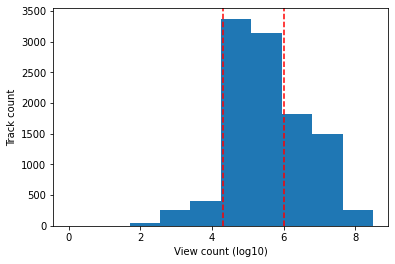

In [17]:
views = df['views']

plt.xlabel("View count (log10)")
plt.ylabel("Track count")
plt.axvline(4.3, color='r', linestyle='--')
plt.axvline(6, color='r', linestyle='--')
plt.hist(np.log10(views[views > 0]),bins=10)

The above histogram suggests that the majority of tracks have views in the (5e+04, 1e05) range. As such, at least 3 different popularity ranges can be identified. The ones below this range, in the range, and above the range. A reasonable definition for a "viral" video is one whose views are above this middle range.

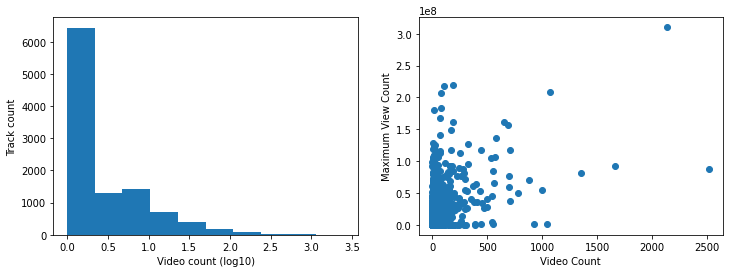

In [21]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].set_xlabel("Video count (log10)")
axs[0].set_ylabel("Track count")
axs[0].hist(np.log10(df['videos']))

axs[1].set_xlabel("Video Count")
axs[1].set_ylabel("Maximum View Count")
axs[1].scatter(df['videos'],views)

From the above histogram it is apparent that most tracks appear in less than 10 videos, with a small minority appearing in more than 100. It is interesting to note here that the highest view counts appear in smaller video counts, apart from a few outliers.

### Correlation
The graph below visualizes the correlation between the features and target variables. There seems to be astrong correlation between loudness and energy, as well as valence and danceability. Other noteble correlations are energy and danceability, and loudness and valence. A relatively strong negative correlation can be observed between acousticness and energy, and acousticness and loudness. The target variable `views` only seems to be slightly correlated with `popularity`

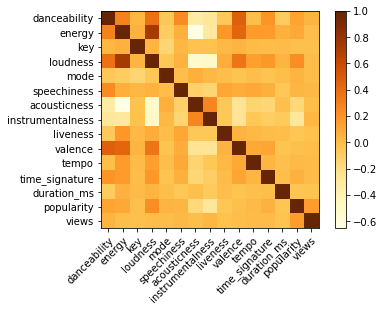

In [22]:
labels = feature_names + ['views']
fig, ax = plt.subplots()
im = ax.imshow(df[labels].corr('pearson'),cmap='YlOrBr')

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

### Feature Exploration

The categorical features of the dataset, namely the key, mode, and time signature will be aggregated and plotted against the total number of views, then each of the continuous features will also be plotted against the views of each video.

<BarContainer object of 5 artists>

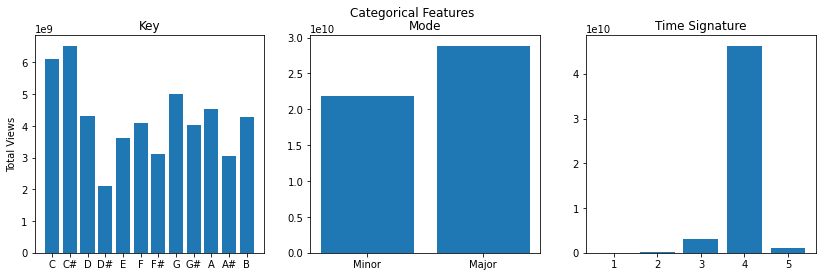

In [23]:
views_per_key = df.groupby("key").sum()['views']
views_per_mode = df.groupby("mode").sum()['views']
views_per_ts = df.groupby("time_signature").sum()['views']

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))
fig.suptitle("Categorical Features")

keys = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
ax1.set_title("Key")
ax1.set_ylabel("Total Views")
ax1.bar(keys,views_per_key)

ax2.set_title("Mode")
ax2.bar(['Minor','Major'],views_per_mode)

ax3.set_title("Time Signature")
ax3.bar(np.arange(5)+1,views_per_ts)

Songs written in the keys of C and C# major seem to be more popular overall, as well as songs using 4 beats per measure.

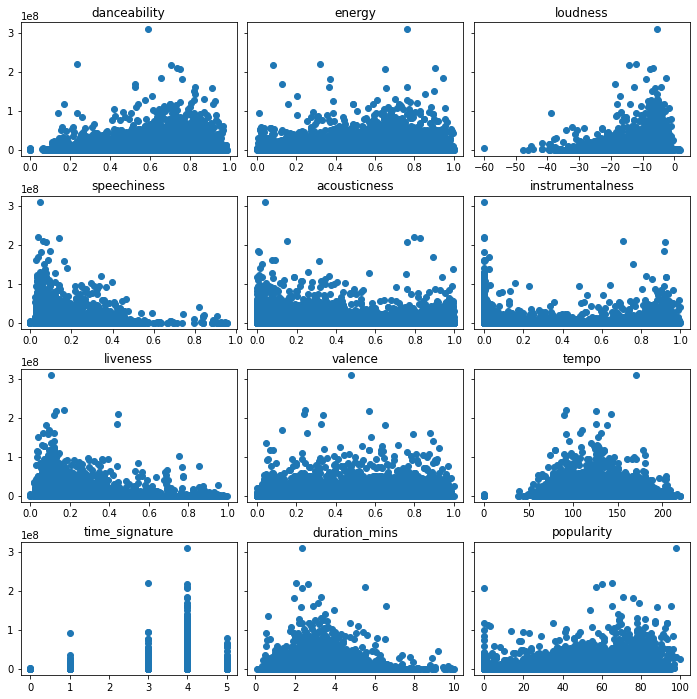

In [24]:
continuous = [
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'time_signature',
    'duration_mins',
    'popularity'
]
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(4,3,wspace=0.05,hspace=.3)
axs = gs.subplots(sharey=True)
df['duration_mins'] = df['duration_ms'] / (60 * 1000)

for idx,feature in enumerate(continuous):
    x = int(idx / 3)
    y = idx - x*3
    ax = axs[x,y]
    ax.set_title(feature)
    if feature == 'duration_mins':
        # Remove outliers for cleaner plot
        mask = df[feature] < 10
        ax.scatter(df[feature][mask],df['views'][mask])
    else:
        ax.scatter(df[feature],df['views'])

Louder songs are observed to perform better in terms of views, as well as songs with a tempo between 100-150 bpm and a duration between 2-4 minutes.